<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/adamczyk/drzewa_losowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dane:
from sklearn import datasets
data = datasets.load_iris()

1.Zwizualizuj dane
2. Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:
a) długość płatka (PetalLengthCm) na poziomie: 0.5
b) długość przegrody (PetalLengthCm) na poziomie: 0.38
Podaj zysk informacyjny na każdym z podziałów
3. Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30%
zbiorze testowym
sklearn.ensemble.RandomForestClassifier
sklearn.tree.DecisionTreeClassifier

In [260]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
data_load = datasets.load_iris()

In [261]:
data_load.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#Zwizualizuj dane

In [262]:
print(data_load['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [263]:
X = pd.DataFrame(data_load['data'], columns = data_load['feature_names'])
y =  pd.DataFrame(data_load['target'], columns = ['target'])
df =  pd.DataFrame(data_load['data'], columns = data_load['feature_names'])
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [264]:
y.value_counts()

target
0         50
1         50
2         50
Name: count, dtype: int64

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [266]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


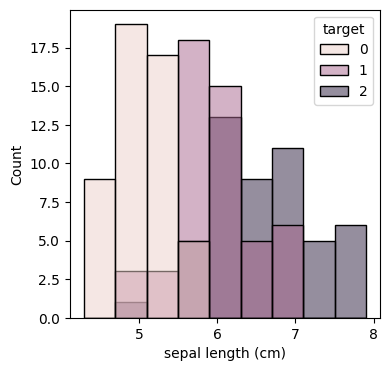

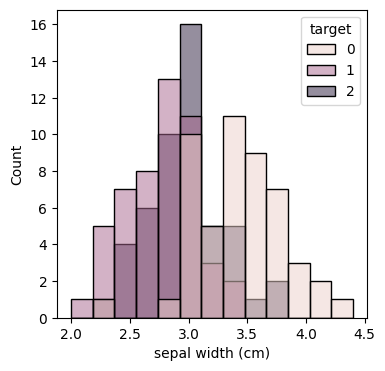

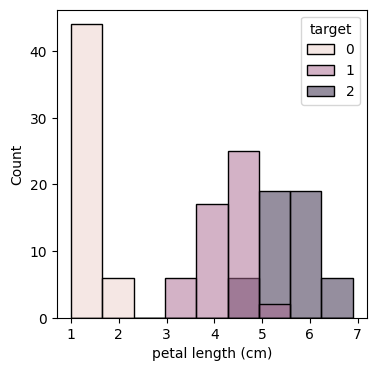

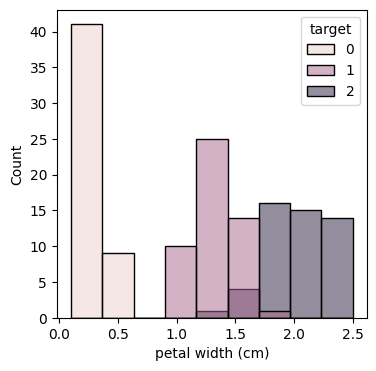

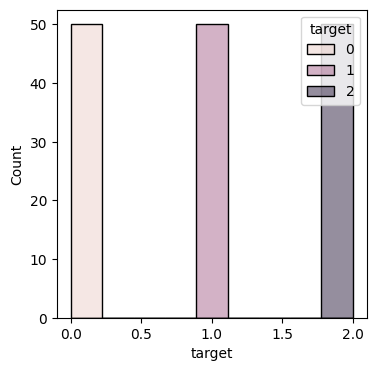

In [267]:
for column in df.columns:
  plt.figure(figsize=(4, 4))
  sns.histplot(data=df, x=column, hue = 'target')
  plt.show()


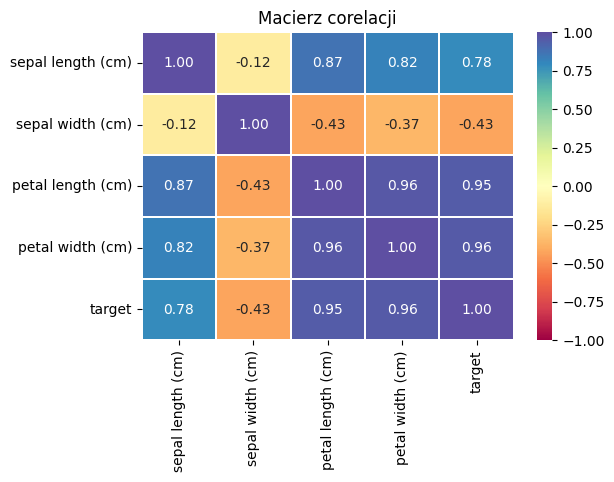

In [268]:
plt.figure(figsize = (6, 4))
sns.heatmap(df.corr(), annot = True, cmap='Spectral',linewidths = 0.1,vmin=-1, vmax=1,  mask=False, fmt=".2f")
plt.title('Macierz corelacji')
plt.show()

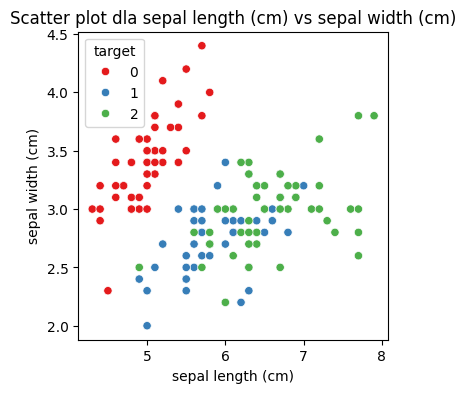

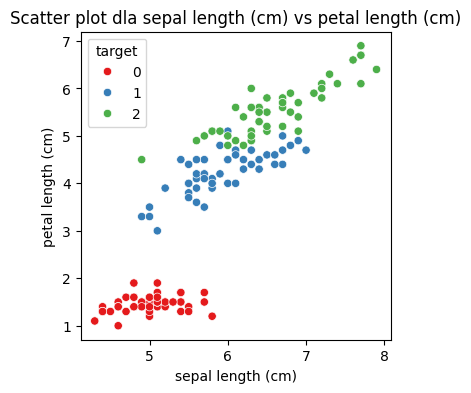

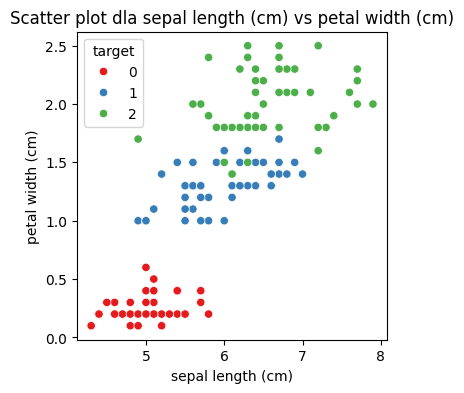

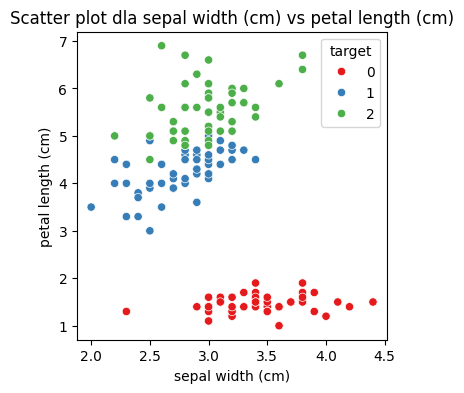

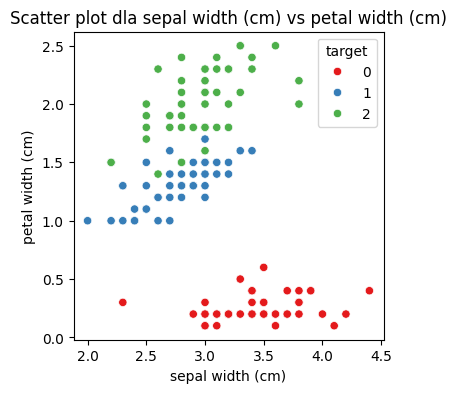

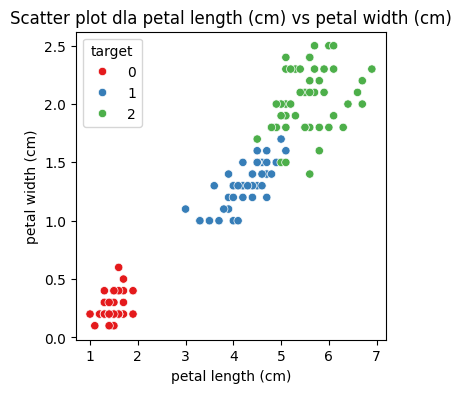

In [269]:
for i, column1 in enumerate(df.columns):
  for j, column2 in enumerate(df.columns):
    if i < j and (column1 != 'target' and column2 != 'target'):
      plt.figure(figsize=(4, 4))
      sns.scatterplot(data=df, x=column1, y=column2, hue='target', palette='Set1')
      plt.title(f'Scatter plot dla {column1} vs {column2}')
      plt.xlabel(column1)
      plt.ylabel(column2)
      plt.legend(title='target')
      plt.show()

# Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:
(Podaj zysk informacyjny na każdym z podziałów)

In [270]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

## szerokość płatka na poziomie: 0.5

In [271]:
print(len(g0_below))
print(len(g1_below))
print(len(g2_below))

41
0
0


In [272]:
print(len(g0_above))
print(len(g1_above))
print(len(g2_above))

9
50
50


In [273]:
#wszystkich etykiet jest tyle samo (50)
treshold = 0.5
feature = 'petal width (cm)'
data = df[['target', feature]]

e_before = -(np.log2(50/150))

n_below=len(df[data[feature] <= treshold])
n_above=len(df[data[feature] > treshold])

g0_above = data[(data[feature] > treshold) & (data['target'] == 0)]
g0_below = data[(data[feature] <= treshold) & (data['target'] == 0)]
g1_above = data[(data[feature] > treshold) & (data['target'] == 1)]
g1_below = data[(data[feature] <= treshold) & (data['target'] == 1)]
g2_above = data[(data[feature] > treshold) & (data['target'] == 2)]
g2_below = data[(data[feature] <= treshold) & (data['target'] == 2)]

e_after_below = - (len(g0_below)/n_below * np.log2(len(g0_below)/n_below) + len(g1_below)/n_below  + len(g2_below)/n_below )
e_after_above = - (len(g0_above)/n_above * np.log2(len(g0_above)/n_above) + len(g1_above)/n_above * np.log2(len(g1_above)/n_above)  + len(g2_above)/n_above * np.log2(len(g2_above)/n_above) )

information_gain = e_before - ((e_after_below+e_after_above)/2)
information_gain

1.0498449721050236

##długość przegrody (sepalLengthCm) na poziomie: 0.38


In [274]:
#wszystkich etykiet jest tyle samo (50)
treshold = 0.38
feature = 'petal width (cm)'
data = df[['target', feature]]

e_before = -(np.log2(50/150))

n_below=len(df[data[feature] <= treshold])
n_above=len(df[data[feature] > treshold])

g0_above = data[(data[feature] > treshold) & (data['target'] == 0)]
g0_below = data[(data[feature] <= treshold) & (data['target'] == 0)]
g1_above = data[(data[feature] > treshold) & (data['target'] == 1)]
g1_below = data[(data[feature] <= treshold) & (data['target'] == 1)]
g2_above = data[(data[feature] > treshold) & (data['target'] == 2)]
g2_below = data[(data[feature] <= treshold) & (data['target'] == 2)]

e_after_below = - (len(g0_below)/n_below * np.log2(len(g0_below)/n_below) + len(g1_below)/n_below  + len(g2_below)/n_below )
e_after_above = - (len(g0_above)/n_above * np.log2(len(g0_above)/n_above) + len(g1_above)/n_above * np.log2(len(g1_above)/n_above)  + len(g2_above)/n_above * np.log2(len(g2_above)/n_above) )

information_gain = e_before - ((e_after_below+e_after_above)/2)
information_gain

0.9206636593898182

#Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [276]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


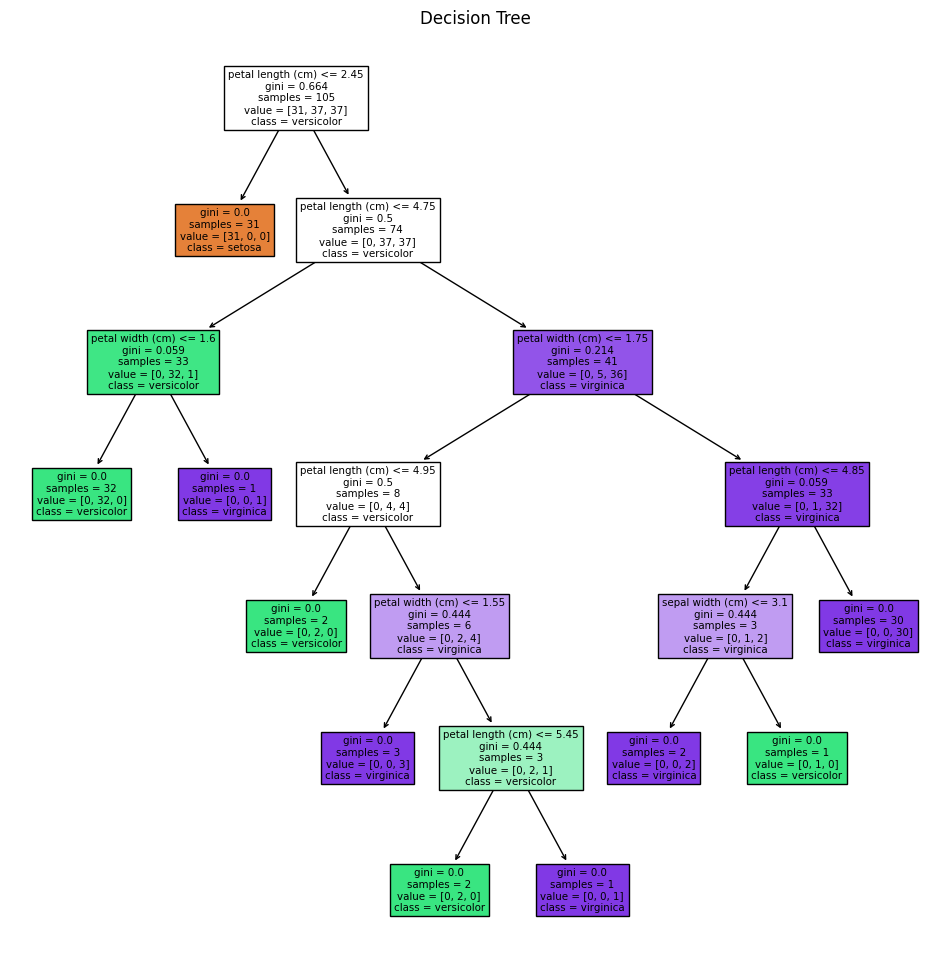

In [277]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 12))
plot_tree(decision_tree, filled=True, feature_names=data_load.feature_names, class_names=data_load.target_names)
plt.title("Decision Tree")
plt.show()

In [278]:
random_forest = RandomForestClassifier(n_estimators=15, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<ipython-input-278-2fdd0e619f2e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)
